Stephen

In [233]:
import matplotlib.pyplot as plt
import requests
import numpy as np 
from scipy import stats
import pandas as pd
#from config import api_key

In [234]:
city_data_gross_square_feet = pd.read_csv("2018-2022_NYCSalesDataV2.csv")
data_frame = pd.DataFrame(city_data_gross_square_feet)
#city_data_gross_square_feet["BOROUGH"]
data_frame




,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,A4,347 EAST 4TH STREET,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000.0,9/29/22
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,S2,110 AVENUE C,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999.0,9/15/22
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,C1,326 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000.0,8/4/22
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,C1,328 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000.0,8/4/22
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,C4,"719 EAST SIXTH STREET, 1B",10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822.0,9/27/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92042,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1010,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1218.0,0.0,4,RK,0.0,8/3/18
92043,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1011,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,522.0,0.0,4,RK,0.0,8/3/18
92044,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1012,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1025.0,0.0,4,RK,0.0,8/3/18
92045,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1013,RK,4260 BROADWAY,10033.0,0.0,1.0,1.0,0.0,1061.0,0.0,4,RK,0.0,8/3/18


In [235]:
#Check column names 
data_frame.columns
columns = data_frame.columns# Display sample data
columns#city_data_gross_square_feet.head()


Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
       'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [236]:
#Numeric data check 
numeric_data = data_frame.select_dtypes(include=['float64'])
numeric_data

,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,SALE PRICE
0,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,399000.0
1,10009.0,2.0,1.0,3.0,1502.0,2790.0,1901.0,2999999.0
2,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,16800000.0
3,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,16800000.0
4,10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,158822.0
...,...,...,...,...,...,...,...,...
92042,10033.0,0.0,1.0,1.0,0.0,1218.0,0.0,0.0
92043,10033.0,0.0,1.0,1.0,0.0,522.0,0.0,0.0
92044,10033.0,0.0,1.0,1.0,0.0,1025.0,0.0,0.0
92045,10033.0,0.0,1.0,1.0,0.0,1061.0,0.0,0.0


In [237]:
#Find the numeric data 
numeric_data = data_frame.select_dtypes(include=['float64'])
commercial_gross_square_feet = numeric_data["GROSS \nSQUARE FEET"].sum()
commercial_gross_square_feet


346520885.0

In [238]:
#Find commercial buildings 
c_class = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']
commercial_buildings = data_frame[data_frame['BUILDING CLASS\nAT TIME OF SALE'].isin(c_class)]
commercial_buildings


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,C1,326 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000.0,8/4/22
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,C1,328 EAST 4TH STREET,10009.0,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000.0,8/4/22
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,C4,"719 EAST SIXTH STREET, 1B",10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822.0,9/27/22
5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,10009.0,5.0,0.0,5.0,2168.0,3728.0,1900.0,2,C2,0.0,8/5/22
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,10009.0,5.0,0.0,5.0,2169.0,3728.0,1900.0,2,C2,0.0,5/10/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74760,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2175,175,C6,"78-86 THAYER STREET, 2A",10040.0,NaN,NaN,NaN,NaN,NaN,1928.0,2,C6,3700000.0,5/24/19
74761,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2175,175,C6,"78-86 THAYER STREET, BB",10040.0,NaN,NaN,NaN,NaN,NaN,1928.0,2,C6,11300000.0,5/24/19
74762,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2176,150,C6,"715 WEST 180TH STREET, 52",10033.0,NaN,NaN,NaN,NaN,NaN,1909.0,2,C6,420000.0,4/29/19
74763,WASHINGTON HEIGHTS UPPER,09 COOPS - WALKUP APARTMENTS,2,2180,32,C6,"550 FORT WASHINGTON AVENUE, 1C",10033.0,NaN,NaN,NaN,NaN,NaN,1922.0,2,C6,329000.0,10/2/19


In [149]:
#Total sales price over the course of the years 
commercial_buildings['SALE PRICE'].sum()

13267868981.0

In [188]:
clean_commercial_buildings = commercial_buildings.dropna(axis=0)
clean_commercial_buildings.tail()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
74695,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2170,500,C1,79-85 FAIRVIEW AVENUE,10040.0,24.0,0.0,24.0,4925.0,15141.0,1928.0,2,C1,0.0,2019-11-05
74696,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2174,8,C7,9 SHERMAN AVENUE,10040.0,92.0,5.0,97.0,18700.0,77854.0,1923.0,2,C7,10.0,2019-05-22
74697,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2174,188,C1,21 ARDEN STREET,10040.0,16.0,0.0,16.0,2970.0,10245.0,1914.0,2,C1,1.0,2019-01-17
74698,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2,2177,130,C1,815 WEST 180 STREET,10033.0,25.0,0.0,25.0,5775.0,23400.0,1912.0,2,C1,9040000.0,2019-02-15
74699,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,2B,2179,436,C5,344 CABRINI BOULEVARD,10040.0,8.0,0.0,8.0,6164.0,7228.0,1915.0,2,C5,1900000.0,2019-02-27


In [230]:
#Neighborhoods 
neighborhoods = clean_commercial_buildings["NEIGHBORHOOD"].unique()
neighborhoods.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [176]:
#Sales price over 5 years 
clean_commercial_buildings['SALE PRICE'].sum()

13267868981.0

In [180]:
#Sales by year 
#sales_data2022 = clean_commercial_buildings['SALE DATE'].between('1/1/2022','12/31/2022')
clean_commercial_buildings.copy()
clean_commercial_buildings['SALE DATE'] = pd.to_datetime(clean_commercial_buildings['SALE DATE'])
sales_data2022 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2022','12/31/2022')]
sales_data2021 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2021','12/31/2021')]
sales_data2020 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2020','12/31/2020')]
sales_data2019 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2019','12/31/2019')]
sales_data2018 = clean_commercial_buildings[clean_commercial_buildings['SALE DATE'].between('1/1/2018','12/31/2018')]



/var/folders/1v/02kbsv0j4zlb128qzg51jm9m0000gn/T/ipykernel_54660/1136620910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_commercial_buildings['SALE DATE'] = pd.to_datetime(clean_commercial_buildings['SALE DATE'])


In [217]:
#Sale price per year 
units_sold2022 = sales_data2022['TOTAL \nUNITS'].sum()
units_sold2021 = sales_data2021['TOTAL \nUNITS'].sum()
units_sold2020 = sales_data2020['TOTAL \nUNITS'].sum()
units_sold2022 = sales_data2019['TOTAL \nUNITS'].sum()
units_sold2022 = sales_data2018['TOTAL \nUNITS'].sum()






In [216]:
#Total sales per year 
five_year_sales = [total_sale_price2018,total_sale_price2019,total_sale_price2020,total_sale_price2021,total_sale_price2022]
five_year_median_sales = [median_sale_price2022, median_sale_price2021,median_sale_price2020,median_sale_price2019,median_sale_price2018]
print(five_year_median_sales)
total_sale_price2022 = sales_data2022['SALE PRICE'].sum()
total_sale_price2021 = sales_data2021['SALE PRICE'].sum()
total_sale_price2020 = sales_data2020['SALE PRICE'].sum()
total_sale_price2019 = sales_data2019['SALE PRICE'].sum()
total_sale_price2018 = sales_data2018['SALE PRICE'].sum()

#Average sales price 
average_price2022 = sales_data2022['SALE PRICE'].mean()
average_price2021 = sales_data2021['SALE PRICE'].mean()
average_price2020 = sales_data2020['SALE PRICE'].mean()
average_price2019 = sales_data2019['SALE PRICE'].mean()
average_price2018 = sales_data2018['SALE PRICE'].mean()

#Median Sales Price 
median_sale_price2022 = sales_data2022['SALE PRICE'].median()
median_sale_price2021 = sales_data2021['SALE PRICE'].median()
median_sale_price2020 = sales_data2020['SALE PRICE'].median()
median_sale_price2019 = sales_data2019['SALE PRICE'].median()
median_sale_price2018 = sales_data2018['SALE PRICE'].median()

#average_price2020

[540000.0, 550000.0, 499500.0, 505000.0, nan]


In [209]:
five_year_sales_dic ={"Mean 2018" : total_sale_price2018,
                      "Mean 2019" : total_sale_price2019,
                      "Mean 2020" : total_sale_price2020,
                      "Mean 2021" : total_sale_price2021,
                      "Mean 2022" : total_sale_price2022}
five_yearsofsales = pd.DataFrame.from_dict(five_year_sales_dic, orient='index')

<Axes: >

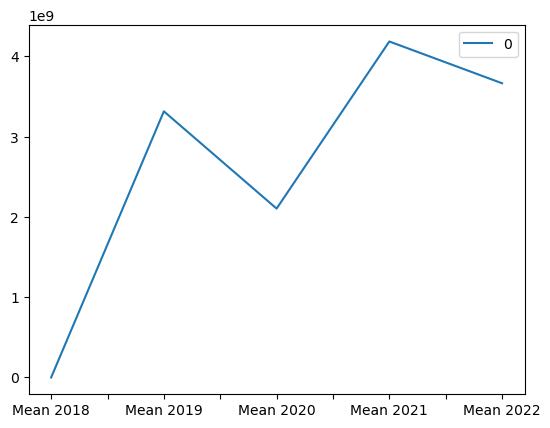

In [210]:
five_yearsofsales.plot()


In [214]:
#Median sales price over five years 
five_year_median_sales_dic ={"Median-2018" : median_sale_price2018,
                      "Median-2019" : median_sale_price2019,
                      "Median-2020" : median_sale_price2020,
                      "Median-2021" : median_sale_price2021,
                      "Median-2022" : median_sale_price2022}
five_year_median_sales = pd.DataFrame.from_dict(five_year_median_sales_dic, orient='index')

<Axes: >

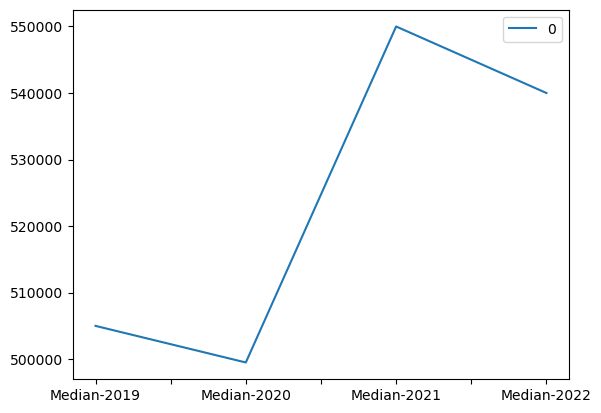

In [215]:
five_year_median_sales.plot()

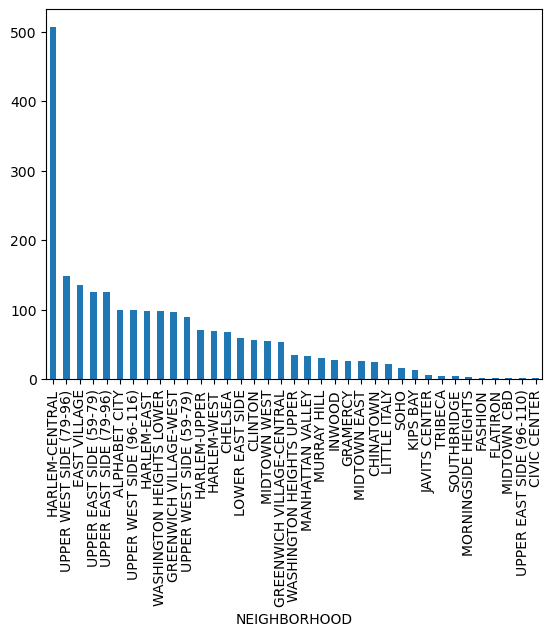

In [241]:
#Sales by neighborhood 
y_axis = clean_commercial_buildings["NEIGHBORHOOD"].value_counts()
y_axis.plot(kind="bar")
plt.show()

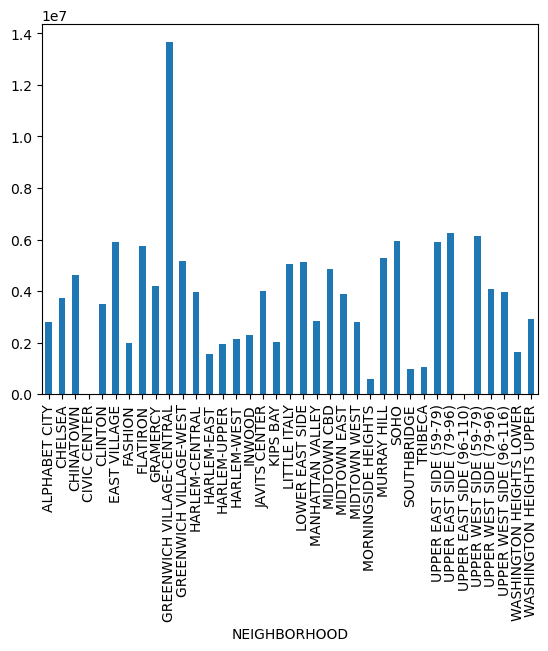

In [244]:
#Average sales price by neighborhood 
y_axis = clean_commercial_buildings.groupby(["NEIGHBORHOOD"])["SALE PRICE"].mean()
y_axis.plot(kind="bar")
plt.show()

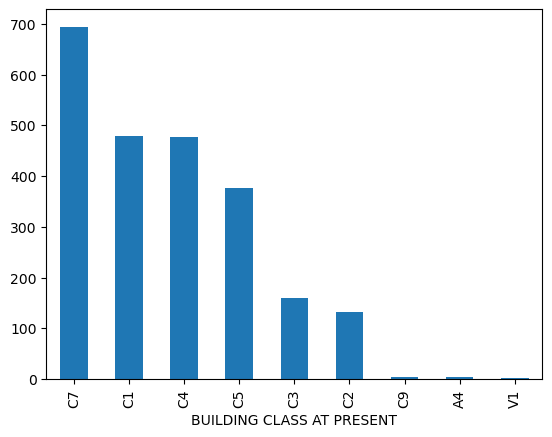

In [245]:
y_axis = clean_commercial_buildings["BUILDING CLASS AT PRESENT"].value_counts()
y_axis.plot(kind="bar")
plt.show()

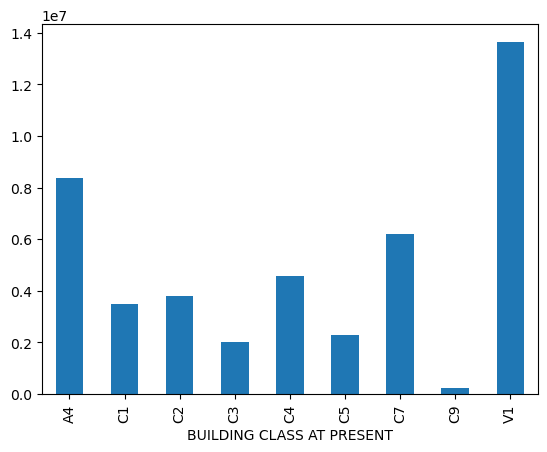

In [246]:
#Sales price by building class 
y_axis = clean_commercial_buildings.groupby(["BUILDING CLASS AT PRESENT"])["SALE PRICE"].mean()
y_axis.plot(kind="bar")
plt.show()

Jonathan

Erika

Khatia